## Linear regression workbook

This workbook will walk you through a linear regression example. It will provide familiarity with Jupyter Notebook and Python.  Please print (to pdf) a completed version of this workbook for submission with HW #1.

ECE C147/C247, Winter Quarter 2023, Prof. J.C. Kao, TAs: T.M, P.L, R.G, K.K, N.V, S.R, S.P, M.E

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

#allows matlab plots to be generated in line
%matplotlib inline 

### Data generation

For any example, we first have to generate some appropriate data to use. The following cell generates data according to the model: $y = x - 2x^2 + x^3 + \epsilon$

Text(0, 0.5, '$y$')

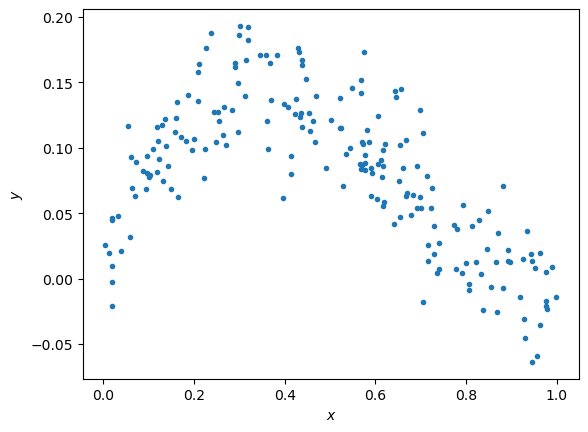

In [2]:
np.random.seed(0)  # Sets the random seed.
num_train = 200     # Number of training data points

# Generate the training data
x = np.random.uniform(low=0, high=1, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

### QUESTIONS:

Write your answers in the markdown cell below this one:

(1) What is the generating distribution of $x$?

(2) What is the distribution of the additive noise $\epsilon$?

### ANSWERS:

(1) $x$ is in uniform distribution which ranges from 0 to 1

(2) $\epsilon$ is in normal distribution which is symmetric about y-axis and the standard deviation is 0.03

### Fitting data to the model (5 points)

Here, we'll do linear regression to fit the parameters of a model $y = ax + b$.

In [3]:
# xhat = (x, 1)
xhat = np.vstack((x, np.ones_like(x)))

# ==================== #
# START YOUR CODE HERE #
# ==================== #
# GOAL: create a variable theta; theta is a numpy array whose elements are [a, b]

theta = np.zeros(2) # please modify this line
xhat_T = xhat.T
x_inv = np.linalg.pinv(xhat.dot(xhat_T))
theta = x_inv.dot(xhat).dot(y)
# ================== #
# END YOUR CODE HERE #
# ================== #

In [4]:
print(theta)

[-0.10599633  0.13315817]


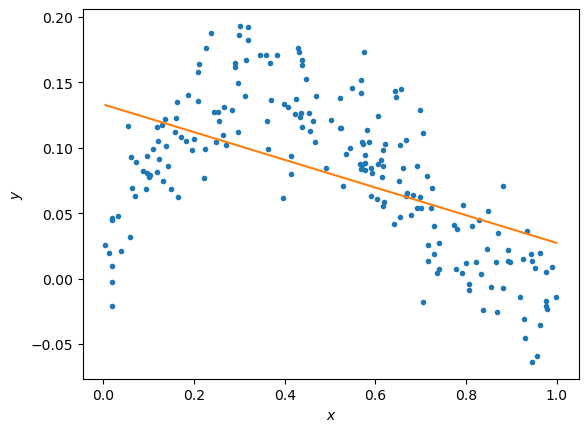

In [5]:
# Plot the data and your model fit.
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression line
xs = np.linspace(min(x), max(x),50)
xs = np.vstack((xs, np.ones_like(xs)))
plt.plot(xs[0,:], theta.dot(xs))

### QUESTIONS

(1) Does the linear model under- or overfit the data?

(2) How to change the model to improve the fitting?

### ANSWERS

(1) This linear model underfit the data because the line doesn't fit many datapoints of the training set.

(2) We can use a polynomial model of a higher order to fit the data.

### Fitting data to the model (5 points)

Here, we'll now do regression to polynomial models of orders 1 to 5.  Note, the order 1 model is the linear model you prior fit.

In [6]:
# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable thetas.
# thetas is a list, where theta[i] are the model parameters for the polynomial fit of order i+1.
#   i.e., thetas[0] is equivalent to theta above.
#   i.e., thetas[1] should be a length 3 np.array with the coefficients of the x^2, x, and 1 respectively.
#   ... etc.

N = 5
x2 = [i**2 for i in x]
x3 = [i**3 for i in x]
x4 = [i**4 for i in x]
x5 = [i**5 for i in x]
x_list = [x5,x4,x3,x2,x,np.ones_like(x)]
# xhats5 = np.vstack((x5,x4,x3,x2,x,np.ones_like(x)))
thetas = [[],[],[],[],[]]
for i in range(N):
    xhats = np.vstack(x_list[-(i+2):])
#     print(xhats.shape)
    xhats_T = xhats.T
    x_inv = np.linalg.pinv(xhats.dot(xhats_T))
    thetas[i] = x_inv.dot(xhats).dot(y)
pass

# ================== #
# END YOUR CODE HERE #
# ================== #

In [7]:
print(thetas)

[array([-0.10599633,  0.13315817]), array([-0.48023061,  0.36743967,  0.05521084]), array([ 0.8843808 , -1.82077417,  0.91178032,  0.00979068]), array([ 0.14080037,  0.60466289, -1.64250929,  0.87250485,  0.01175321]), array([ 0.52432591, -1.164568  ,  1.76052438, -2.07430275,  0.93373916,
        0.009716  ])]


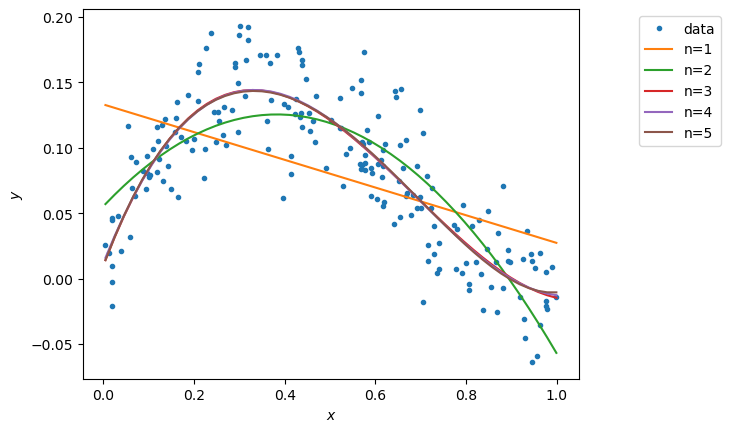

In [8]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

### Calculating the training error (5 points)

Here, we'll now calculate the training error of polynomial models of orders 1 to 5.

In [9]:
training_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable training_errors, a list of 5 elements,
# where training_errors[i] are the training loss for the polynomial fit of order i+1.
for i in range(N):
    theta = thetas[i]
    xhats = np.vstack(x_list[-(i+2):])
    y_pred = theta.dot(xhats)
    train_err = (np.sum(np.square(np.array(y - y_pred))) / num_train) ** 0.5
    training_errors.append(train_err)
pass

# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Training errors are: \n', training_errors)

Training errors are: 
 [0.04878484486357111, 0.03305287008607351, 0.02858251878527393, 0.028575083088762804, 0.028568302706890553]


### QUESTIONS

(1) What polynomial has the best training error?

(2) Why is this expected?

### ANSWERS

(1) I think the 3/4/5 has the best training error (though not exactly same but very similar)

(2) This is because the generating model has a polynomial order of 3, so the linear model or the polynomial model of order 2 couldn't fit the generating model the best.
As for models with higher polynomial order, they are more complicated and the coefficients for x^4 or x^5 will be automatically set to zero according to our derivative, so 3/4/5 polynomial models have better and similar performance.

### Generating new samples and testing error (5 points)

Here, we'll now generate new samples and calculate testing error of polynomial models of orders 1 to 5.

Text(0, 0.5, '$y$')

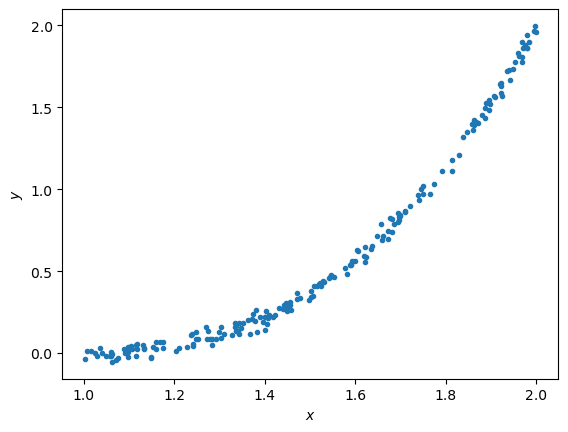

In [10]:
x = np.random.uniform(low=1, high=2, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [11]:
xhats = []
for i in np.arange(N):
    if i == 0:
        xhat = np.vstack((x, np.ones_like(x)))
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        xhat = np.vstack((x**(i+1), xhat))
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))
                              
    xhats.append(xhat)

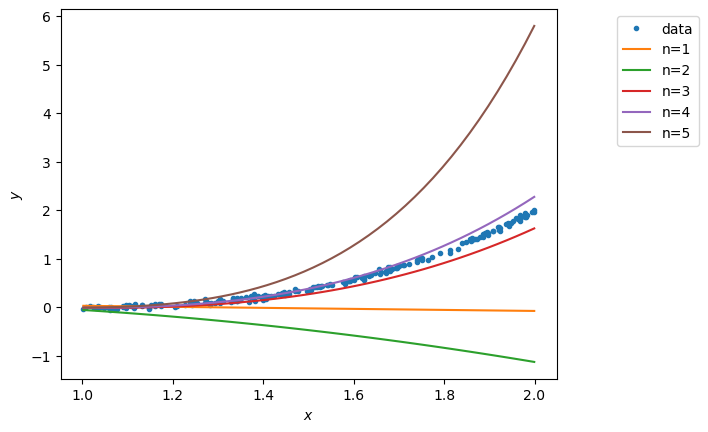

In [12]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

In [13]:
testing_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable testing_errors, a list of 5 elements,
# where testing_errors[i] are the testing loss for the polynomial fit of order i+1.
for i in range(N):
    theta = thetas[i]
    x = xhats[i]
#     print(x.shape)
    y_pred = theta.dot(x)
    test_err = (np.sum(np.square(np.array(y - y_pred))) / num_train) ** 0.5
    testing_errors.append(test_err)
pass

# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Testing errors are: \n', testing_errors)

Testing errors are: 
 [0.8992310706681896, 1.4601093262169904, 0.17679641139969646, 0.10895304128478694, 1.4659816421052532]


### QUESTIONS

(1) What polynomial has the best testing error?

(2) Why polynomial models of orders 5 does not generalize well?

### ANSWERS

(1) The 4 polynoimal ths the best testing error: nearly 0.109.

(2) Because our data is actually not complex, and the polynomial of 5 is too complicated for such a simple dataset, which will cause overfitting, which means it may fit the training data pretty well but would might have a bad performance when dealing with new data (testing data).